In [1]:
import pandas as pd
from utils.addTimeInformation import addTimeInformation
from utils.calculateConsumption import calculateConsumption, getConsumptionYear, calculateConsumption_lastprofile
from utils.plotWeekDiagram import plotWeekDiagramm, create_week_comparison
from utils.read_CSV import getData
from utils.extraploation_class import Extrapolation

# VARIABLES
consumption_development_rate = 1.045
# VARIABLES END


consumption_existing_years = calculateConsumption(consumption_development_rate)

Data für 2023 loaded succsessfully.


# Mit Lastprofilen

In [2]:
lastprofil_workday = pd.read_csv('CSV/Lastprofile/eMobilitaet/lastprofil_werktag.csv', delimiter= ';', thousands='.', decimal=',', dayfirst ="True") #, parse_dates=[[0,1]]
lastprofil_saturday = pd.read_csv('CSV/Lastprofile/eMobilitaet/lastprofil_samstag.csv', delimiter= ';', thousands='.', decimal=',', dayfirst ="True") #, parse_dates=[[0,1]]
lastprofil_sunday = pd.read_csv('CSV/Lastprofile/eMobilitaet/lastprofil_sonntag.csv', delimiter= ';', thousands='.', decimal=',', dayfirst ="True") #, parse_dates=[[0,1]]

# Speichern der Lastprofile in einem Dictionary
lastprofile_dict = {
    'workday': lastprofil_workday,
    'saturday': lastprofil_saturday,
    'sunday': lastprofil_sunday
}


consumption_existing_years_lastprofile = calculateConsumption_lastprofile(consumption_development_rate, lastprofile_dict)

Data für 2023 loaded succsessfully.


                    Datum  Gesamtverbrauch
12668 2024-05-13 00:00:00      11046.17250
12669 2024-05-13 00:15:00      11052.70375
12670 2024-05-13 00:30:00      10939.58250
12671 2024-05-13 00:45:00      10804.77750
12672 2024-05-13 01:00:00      10624.51500
...                   ...              ...
13335 2024-05-19 22:45:00      11420.54375
13336 2024-05-19 23:00:00      11198.22000
13337 2024-05-19 23:15:00      11008.03000
13338 2024-05-19 23:30:00      10793.28250
13339 2024-05-19 23:45:00      10656.38750

[672 rows x 2 columns]
                    Datum  Gesamtverbrauch
12668 2024-05-13 00:00:00     11159.862319
12669 2024-05-13 00:15:00     11152.911038
12670 2024-05-13 00:30:00     11026.307257
12671 2024-05-13 00:45:00     10878.019726
12672 2024-05-13 01:00:00     10684.274694
...                   ...              ...
13335 2024-05-19 22:45:00     11545.536335
13336 2024-05-19 23:00:00     11317.592884
13337 2024-05-19 23:15:00     11120.620485
13338 2024-05-19 23:30:00     

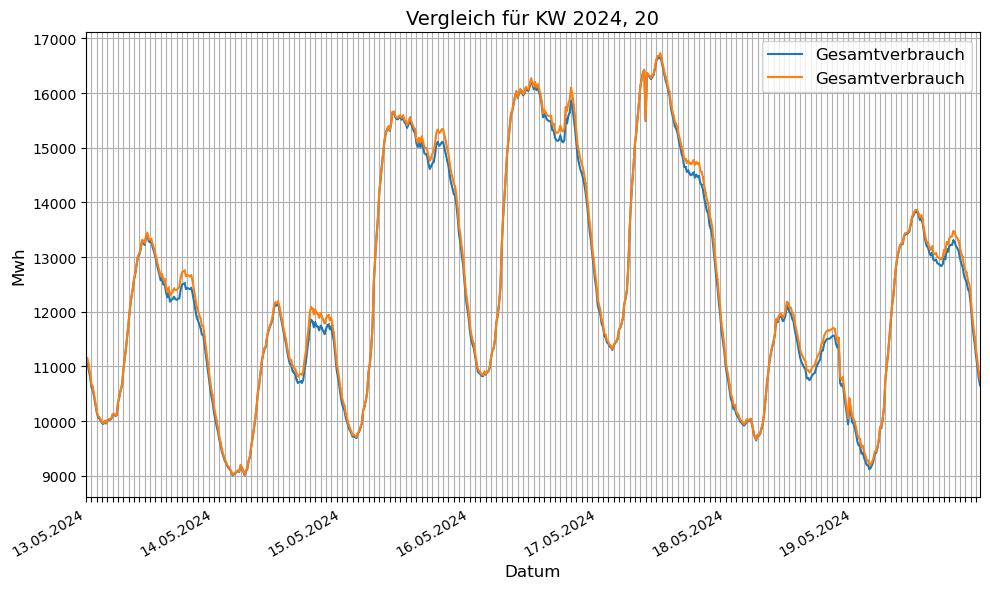

In [3]:
selected_week = '20'
selected_year = '2024'



def get_weekly_consumption(consumption_data, selected_year, selected_week):
    # Erstelle einen DataFrame aus dem Dictionary
    yearly_consumption = pd.DataFrame.from_dict(consumption_data.get(int(selected_year)))

    # Filtere die Daten für die angegebene Woche und das Jahr
    week_filtered_data_consumption = yearly_consumption[
        (yearly_consumption['Week'] == selected_week)
    ]

    # Erstelle einen DataFrame nur mit Datum und Gesamtverbrauch
    week_consumption_df = week_filtered_data_consumption[['Datum', 'Gesamtverbrauch']]
    week_consumption_df.loc[:, 'Datum'] = pd.to_datetime(week_consumption_df['Datum'])

    return week_consumption_df


# Verwende die Funktion für consumption_existing_years
week_consumption_df = get_weekly_consumption(consumption_existing_years, selected_year, selected_week)

# Verwende die Funktion für consumption_existing_years_lastprofile
week_consumption_df_lp = get_weekly_consumption(consumption_existing_years_lastprofile, selected_year, selected_week)

print(week_consumption_df)
print(week_consumption_df_lp)

# didirectory_yearly_generation and consumption_existing_years are dicitionaries

create_week_comparison(selected_week, selected_year, week_consumption_df, week_consumption_df_lp)